# Đồ án cuối kỳ

**Các thành viên:**
1. MSSV: 1712496 - Họ tên: Nguyễn Trần Công Huy
2. MSSV: 1712556 - Họ tên: Hoàng Huy Lịch

---

## Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

---

## Thu thập dữ liệu

Trong đồ án lần này, nhóm em sẽ sử dụng dữ liệu đã được thu thập sẵn là file "*data.csv*"; đây là dữ liệu về số lượng người tự tử thống kê theo từng năm trên từng quốc gia từ 1985 đến 2016. <br>
Dữ liệu này đã được public trên [Kaggle](https://www.kaggle.com/), gốc ở [đây](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016). <br>
Tập dữ liệu này được merged từ 4 nguồn khác nhau với key là thời gian và vị trí địa lý, lần lượt gồm:
- [United Nations Development Program. (2018). Human development index (HDI)](http://hdr.undp.org/en/indicators/137506).
- [World Bank. (2018). World development indicators: GDP (current US$\$$) by country: 1985 to 2016](http://databank.worldbank.org/data/source/world-development-indicators#).
- [[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook).
- [World Health Organization. (2018). Suicide prevention](https://www.who.int/health-topics/suicide).

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file .csv vào Dataframe

In [3]:
suicide_df = pd.read_csv('data.csv')
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


### Dữ liệu gồm bao nhiêu dòng và cột?

In [4]:
num_rows, num_cols = suicide_df.shape
num_rows, num_cols

(27820, 12)

`suicide_df` có 27820 dòng với 12 cột

### Mỗi dòng có ý nghĩa gì?  Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng tượng trưng cho một nhóm người được chia theo độ tuổi thống kê tại một quốc gia ở một thời điểm nhất định với các thông tin (có thể) liên quan tới số lượng người tự tử trong nhóm ấy.

### Dữ liệu có các dòng bị lặp không?

In [5]:
have_duplicated_rows = any(suicide_df.duplicated())

In [6]:
assert have_duplicated_rows == False

### Mỗi cột có ý nghĩa gì?

Mô tả ý nghĩa các cột trong dữ liệu này: <br>
- **country**: tên của quốc gia.
- **year**: năm đang xét.
- **sex**: giới tính.
- **age**: nhóm độ tuổi.
- **suicides_no**: số lượng người tự tử trong nhóm này.
- **population**: tổng số người thống kê được trong nhóm này.
- **suicides/100k pop**: số lượng người tự tử trong 100.000 người .
- **country-year**: tên của quốc gia + năm.
- **HDI for year**: chỉ số HDI (human development index) trong năm của nhóm này.
- **gdp_for_year ($\$$)**: GDP trong năm của nhóm này.
- **gdp_per_capita ($\$$)**: GDP bình quân đầu người của nhóm này.
- **generation**: thế hệ của nhóm này.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
col_dtypes = suicide_df.dtypes
col_dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

**Cột có dtype là object nghĩa là sao?**

`suicide_df` có 4 cột có `dtype` là `object` gồm: 'country', 'sex', 'age', 'country-year' và 'generation', ta cần tìm xem kiểu dữ liệu thật của các cột này là gì.

In [8]:
def get_type(e):
    return type(e[0])

def open_object_dtype(s): 
    dtypes = set()
    dtypes.update(np.apply_along_axis(get_type, 1, s.values[:, np.newaxis]))    
    return dtypes

assert open_object_dtype(suicide_df['country']) == {str}
assert open_object_dtype(suicide_df['sex']) == {str}
assert open_object_dtype(suicide_df['age']) == {str}
assert open_object_dtype(suicide_df['country-year']) == {str}
assert open_object_dtype(suicide_df['generation']) == {str}

Vậy không có cột nào có tình trạng hỗn hợp nhiều kiểu dữ liệu.

### Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

Ta có 7 cột thuộc nhóm numeric gồm: 'year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_for_year (\\$)' và 'gdp_per_capita (\\$)'.
Trong mục này, ta sẽ tìm tỉ lệ thiếu sót, giá trị max và min trên từng cột nói trên.

In [9]:
numeric_columns = np.array([
    'year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year',
    'gdp_for_year ($)', 'gdp_per_capita ($)'
])


def missing_ratio(numerics):
    return numerics.isna().mean() * 100


numeric_df = suicide_df[numeric_columns]
nume_col_profiles_df = numeric_df.agg(
    [missing_ratio, pd.Series.min, pd.Series.max])
nume_col_profiles_df

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
missing_ratio,0.0,0.0,0.0,0.00,69.935298,0.000000e+00,0.0
min,1985.0,0.0,278.0,0.00,0.483000,4.691962e+07,251.0
max,2016.0,22338.0,43805214.0,224.97,0.944000,1.812071e+13,126352.0


Cột 'HDI for year' có tỉ lệ giá trị thiếu khá cao, đáng xem xét để được loại bỏ.

---

Ngoài ra, ta còn cần kiểm tra xem, ứng với từng năm thì số lượng thông tin thống kê được có chênh lệch ở một mức độ chấp nhận được hay không, để xem xét loại bỏ những năm thiếu sót dữ liệu quá lớn.

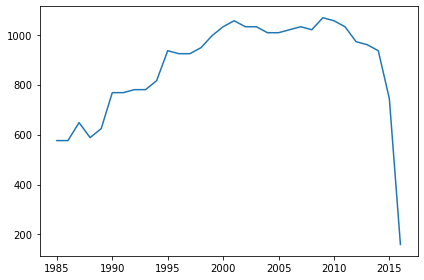

In [10]:
year_profiles_df = suicide_df.groupby(['year'])['year'].count()
plt.plot(year_profiles_df.keys(), year_profiles_df.values)
plt.tight_layout()

Vào năm 2016, lượng thông tin thu thập được thấp một cách bất thường, cần xem xét để được loại bỏ.

### Với mỗi cột có kiểu dữ liệu phân loại (categorical), các giá trị được phân bố như thế nào?

Ta có 5 cột thuộc nhóm categorical gồm: 'country', 'sex', 'age', 'country-year' và 'generation'.
Trong mục này, ta sẽ tìm tỉ lệ thiếu sót,  số lượng giá trị khác nhau, list/array các giá trị khác nhau của các cột nói trên.

In [11]:
categorical_columns = np.array([ 'country', 'sex', 'age', 'country-year', 'generation'])
categorical_df = suicide_df[categorical_columns]
cate_col_profiles_df = categorical_df.agg(
    [missing_ratio, pd.Series.nunique, pd.Series.unique])
cate_col_profiles_df.rename(index={
    'nunique': 'num_diff_vals',
    'unique': 'diff_vals'
}, inplace=True)
cate_col_profiles_df

,country,sex,age,country-year,generation
missing_ratio,0,0,0,0,0
num_diff_vals,101,2,6,2321,6
diff_vals,"[Albania, Antigua and Barbuda, Argentina, Arme...","[male, female]","[15-24 years, 35-54 years, 75+ years, 25-34 ye...","[Albania1987, Albania1988, Albania1989, Albani...","[Generation X, Silent, G.I. Generation, Boomer..."


Các cột này có vẻ không xảy ra vấn đề gì, tuy nhiên như có thể thấy, cột 'country-year' chỉ là một chuỗi kết hợp giữa giá trị từ cột 'country' và cột 'year', không đem lại nhiều ý nghĩa, nên xem xét để được loại bỏ.

## Tiền xử lý

### Loại bỏ cột 'HDI for year' và cột 'country-year'

In [12]:
dropping_columns = np.array(['HDI for year','country-year'])
suicide_df.drop(columns=dropping_columns, inplace=True)
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


### Xóa các dòng thuộc năm 2016

In [13]:
year_filter = suicide_df['year'] == 2016
year_filter_indicies = year_filter[year_filter].index
suicide_df.drop(year_filter_indicies, axis=0, inplace=True)

In [14]:
assert len(suicide_df[suicide_df['year'] == 2016]) == 0

## Các câu hỏi có ý nghĩa

**Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:**
1. Xu hướng tăng giảm của tỉ lệ tự tử trên từng quốc gia, và chỉ ra những quốc gia đứng top, từ đó ta có thể giúp những người có nhu cầu nhập cư nước ngoài một nguồn thông tin tham khảo để lên kế hoạch, vì tỉ lệ tự tử có nhiều liên quan đến chỉ số hạnh phúc của một quốc gia.

## Khám phá dữ liệu (tiếp tục)

### Trường hợp các quốc gia có năm tỉ lệ tự tử bằng không

Trong dữ liệu trên, có những quốc gia một số năm tỉ lệ tự tử bằng không, dễ cho ta cảm giác không hợp lý, ta cần kiểm tra xem, những năm còn lại thu thập được tại quốc gia đó có tỉ lệ này như thế nào, nếu mà độ chênh lệch quá lớn, thì ta có thể xem đây là thông tin gây nhiễu.

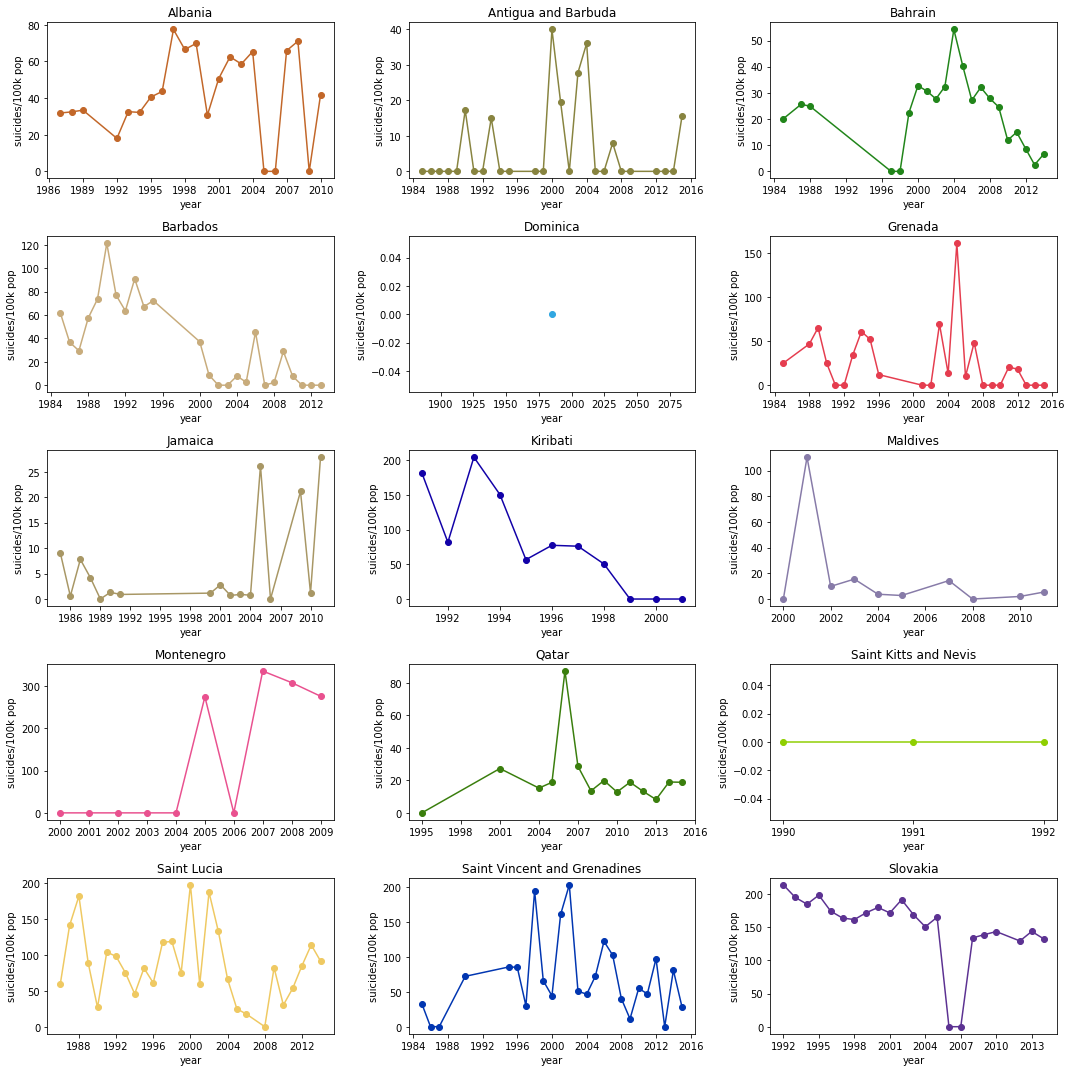

In [15]:
suicides_sum_df = suicide_df.groupby(['country',
                                          'year'])['suicides/100k pop'].sum()
zero_suicide_countries = suicides_sum_df[suicides_sum_df == 0].index.get_level_values('country').unique().tolist()
# đối với tất cả các quốc gia này, vẽ biểu đồ thể hiện tỉ lệ tự tử những năm recorded đc
suicides_sum_df = suicides_sum_df.loc[suicides_sum_df.index.get_level_values('country').isin(zero_suicide_countries)]

fig, ax = plt.subplots(5,3, figsize=(15,15))

colors = np.random.rand(15,3)
for index, country in enumerate(zero_suicide_countries):
    years = suicides_sum_df[country].index
    suicides_sum = suicides_sum_df[country].values
    #plot
    row, col  = int(index/3), index%3
    ax[row,col].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax[row, col].plot(years,suicides_sum, marker='o',color=colors[index])
    ax[row, col].set_title(country)
    ax[row, col].set_xlabel('year')
    ax[row, col].set_ylabel('suicides/100k pop')
fig.tight_layout()

Từ biểu đồ trên, hầu hết những năm có ca tự tử đều rất cao, ta tạm kết luận những năm có số ca tự tử là 0 có nghĩa là quá trình thu thập thông tin bị sai.

---

### Trường hợp những quốc gia có ít mẫu thu thập được

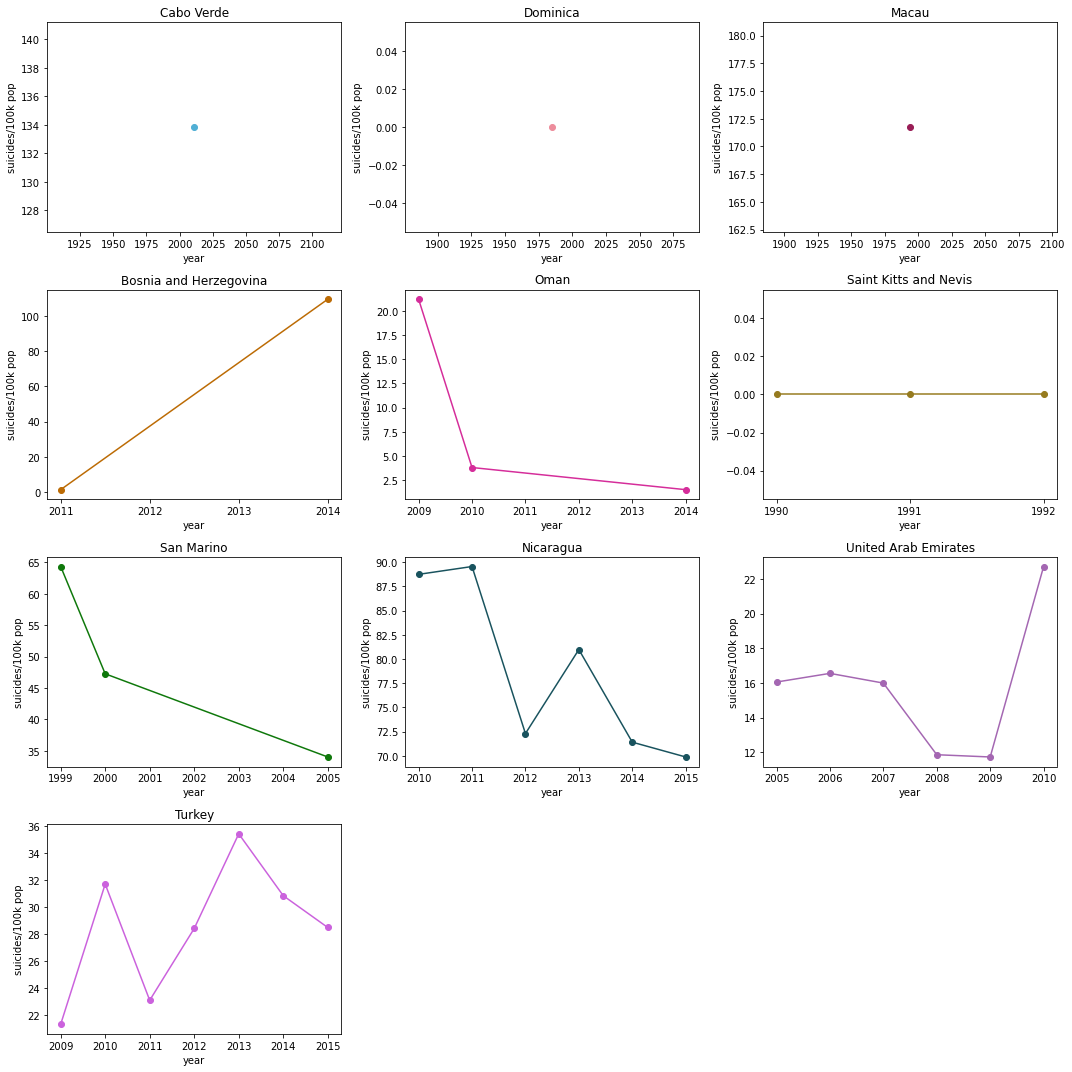

In [16]:
# get countries with least amount of records
country_samples_recorded_df = suicide_df.groupby(
    ['country', 'year'])['year'].count()
countries = country_samples_recorded_df.index.get_level_values('country').unique().tolist()
samples_by_country = {}
for country in countries:
    samples_by_country[country] = country_samples_recorded_df[country].sum()
records_dict = dict(sorted(samples_by_country.items(), key=lambda item: item[1]))
records_df = pd.DataFrame.from_dict({'countries':records_dict.keys(),'records':records_dict.values()})
# 10% least
partition = np.percentile(records_df['records'], q=[10])[0]
least_recorded_countries = np.array(records_df[records_df['records'] < partition]['countries'])


#plot
suicides_sum_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
fig, ax = plt.subplots(4,3, figsize=(15,15))
fig.delaxes(ax[3][2])
fig.delaxes(ax[3][1])
colors = np.random.rand(10,3)
for index, country in enumerate(least_recorded_countries):
    years = suicides_sum_df[country].index
    suicides_sum = suicides_sum_df[country].values
    row, col  = int(index/3), index%3
    ax[row, col].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax[row, col].plot(years,suicides_sum, marker='o',color=colors[index])
    ax[row, col].set_title(country)
    ax[row, col].set_xlabel('year')
    ax[row, col].set_ylabel('suicides/100k pop')
fig.tight_layout()

Với các quốc gia chỉ có 2 hoặc 3 mẫu dữ liệu, thì không hề cho ta biết được xu hướng của tỉ lệ tử vong tại nước này diễn ra như thế nào, các quốc gia còn lại tuy dễ hình dung hơn, tuy nhiên, vì lượng dữ liệu quá ít nên hiện tại (2021), mọi thứ rất có thể đã thay đổi hoàn toàn khác so với biểu đồ trên.

## Tiền xử lý (tiếp tục)

### Xóa những năm mà quốc gia đó không có ca tự tử nào

In [17]:
suicides_by_year_df = suicide_df.groupby(['country',
                                          'year'])['suicides/100k pop'].sum()
zero_suicide_year_by_country = list(suicides_by_year_df[suicides_by_year_df == 0].index)
for country, year in zero_suicide_year_by_country:
    filt = (suicide_df['country'] == country) & (suicide_df['year'] == year)
    indices = filt[filt].index
    suicide_df.drop(indices, axis=0, inplace=True)

In [18]:
updated_zero_suicides_df = suicide_df.groupby(['country','year'])['suicides/100k pop'].sum()
assert len(updated_zero_suicides_df[updated_zero_suicides_df == 0]) == 0

### Loại bỏ top 10% các quốc gia có số mẫu thu thập ít nhất

In [19]:
p = 10
def normalize(val):
    if val != val: return 0
    return val

country_samples_recorded_df = suicide_df.groupby(
    ['country', 'year'])['year'].count().unstack(1).apply([normalize],
                                                          axis=1)
country_samples_recorded_df = country_samples_recorded_df.apply([pd.Series.sum],axis=1)
country_samples_recorded_df = country_samples_recorded_df.unstack(1)[('sum','normalize')]
country_samples_recorded_df = pd.DataFrame(data={'country':country_samples_recorded_df.keys(),
                                              'recorded_samples': country_samples_recorded_df.values})

partition = np.percentile(country_samples_recorded_df['recorded_samples'], q=[p])[0]
# remove
country_samples_recorded_df = country_samples_recorded_df[country_samples_recorded_df['recorded_samples'] >= partition]
suicide_df = country_samples_recorded_df.merge(suicide_df, left_on='country',right_on='country', how='inner')

## Phân tích dữ liệu để trả lời các câu hỏi trên

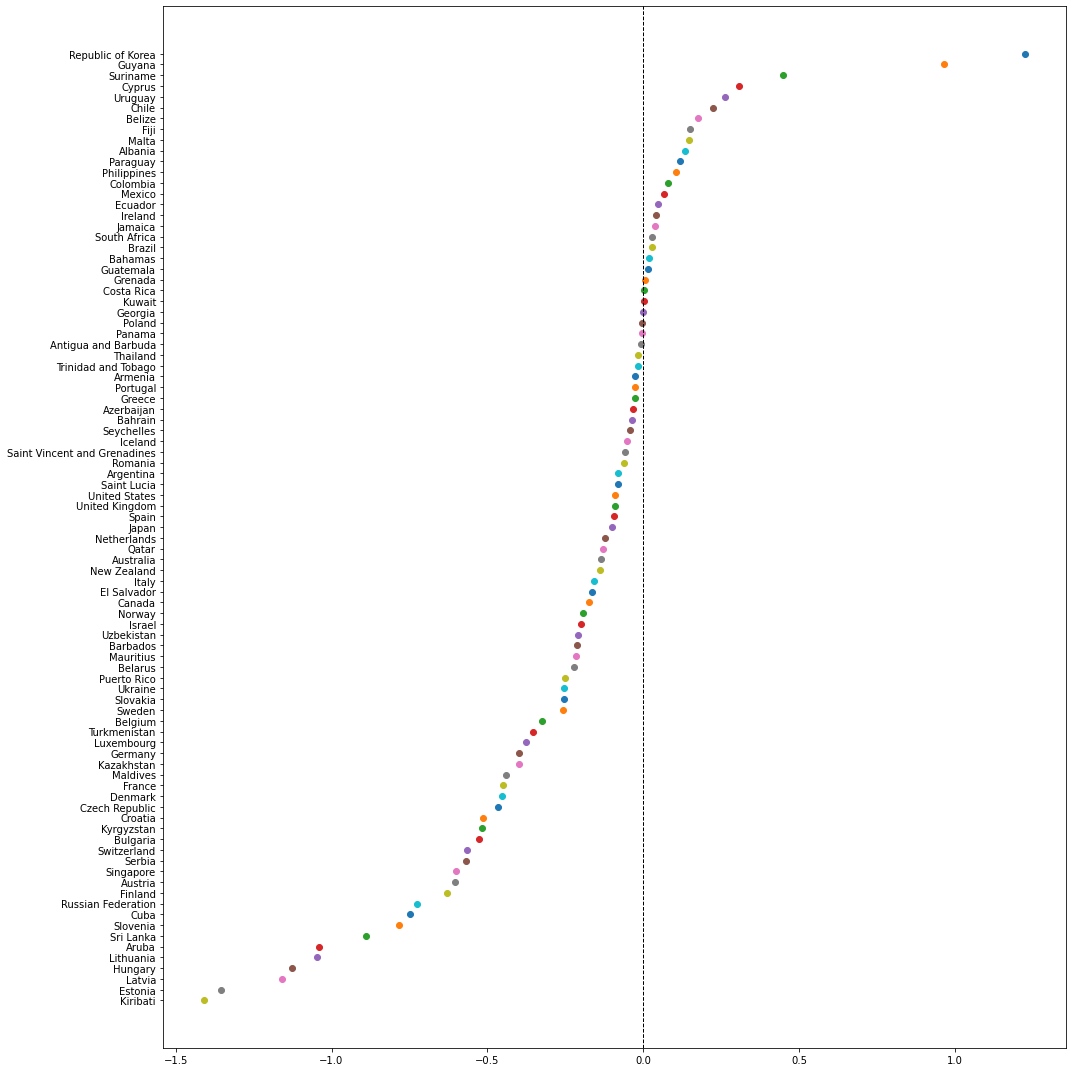

In [20]:
avg_suicides_by_year_df = suicide_df.groupby(['country', 'year'
                                              ])['suicides/100k pop'].mean()
countries = np.unique(suicide_df['country'].values)
suicide_trend = {}  # dictionary of country with values are slope and bias
for country in countries:
    years = avg_suicides_by_year_df[country].keys()
    suicides = avg_suicides_by_year_df[country].values
    coef = np.polyfit(years, suicides, 1)
    polyfunc = np.poly1d(coef)
    suicide_trend[country] = {}
    suicide_trend[country]['years'] = years
    suicide_trend[country]['suicides'] = suicides
    suicide_trend[country]['coef'] = coef
    # suicide_trend[country]['linreg'] = polyfunc(years)
    # fit linear regression
suicide_trend = dict(
    sorted(suicide_trend.items(),
           key=lambda item: item[1]['coef'][0],
           reverse=True))
fig, ax = plt.subplots(figsize=(15, 15))
for country, properties in suicide_trend.items():
    ax.scatter([properties['coef'][0]], [country])
ax.axvline(0, color='k', linestyle='dashed', linewidth=1)
ax.invert_yaxis()
plt.tight_layout()

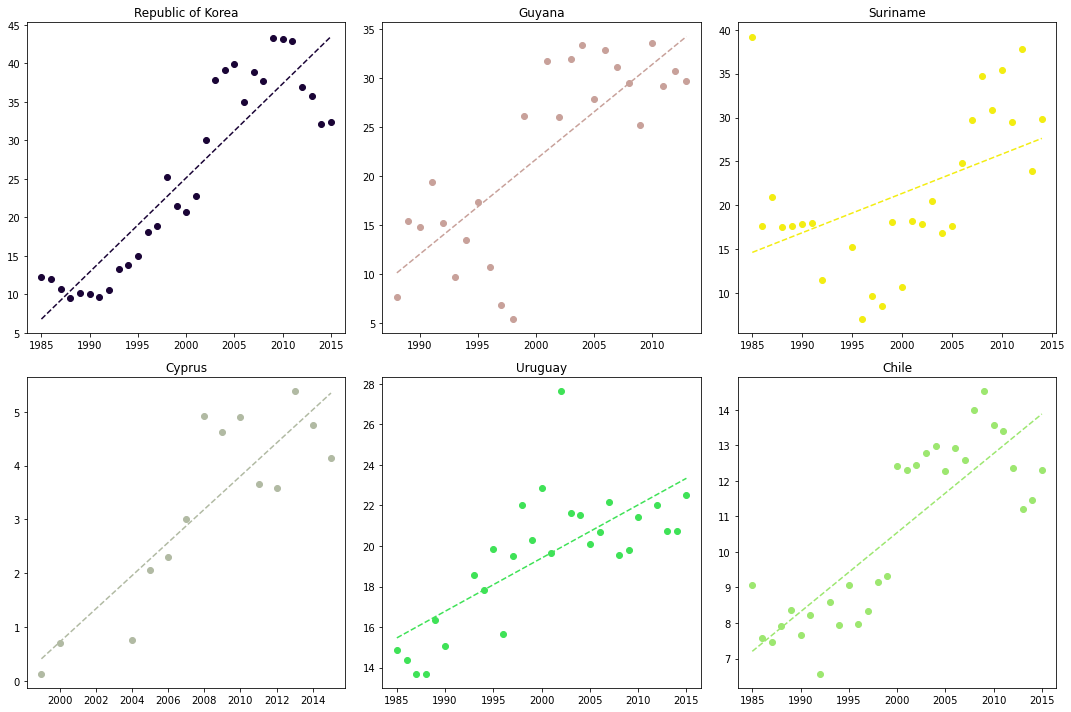

In [90]:
# pick những quốc gia thuộc top tăng/giảm tỉ lệ tự tử
top_increasing_countries = (np.array(list(suicide_trend.items()))[:6])[:, 0]
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
colors = np.random.rand(6,3)
for index,country in enumerate(top_increasing_countries):
    row, col = int(index / 3), index % 3
    years = np.array(suicide_trend[country]['years'])
    suicides = np.array(suicide_trend[country]['suicides'])
    coef = suicide_trend[country]['coef']
    ax[row, col].plot(years,suicides,'o', years, coef[0]*years + coef[1],'--k', color=colors[index])
    
    #plt.scatter(years, countries)
    ax[row][col].set_title(country)
plt.tight_layout()

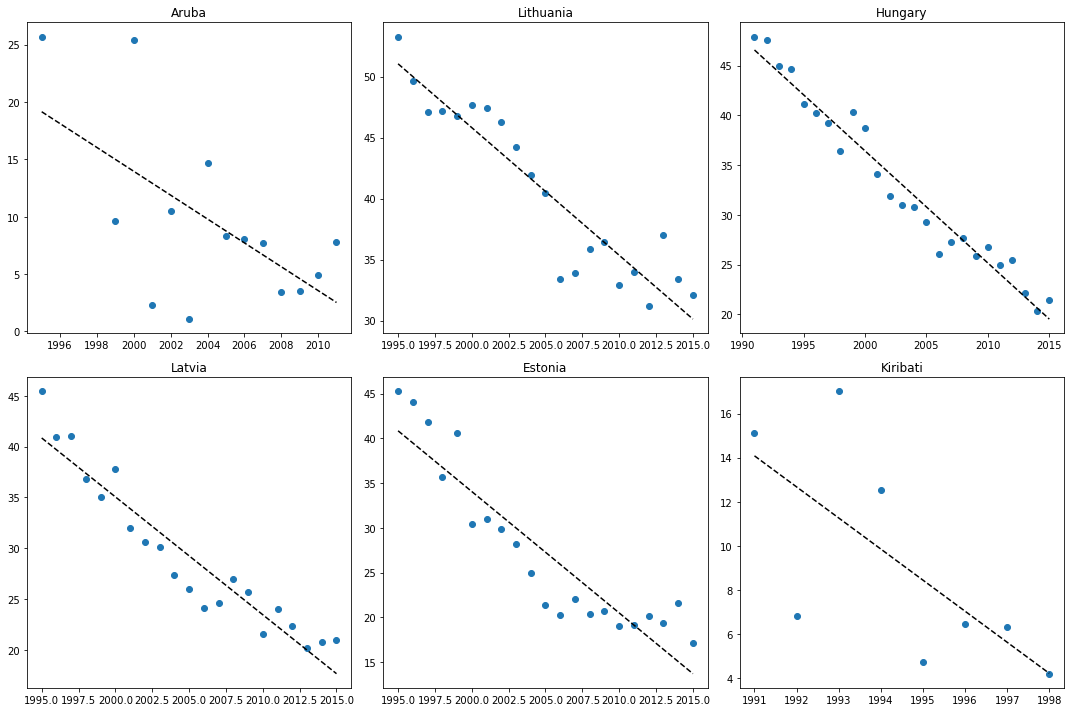

In [87]:
top_decreasing = (np.array(list(suicide_trend.items()))[-6:])[:,0]
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for index,country in enumerate(top_decreasing):
    row, col = int(index / 3), index % 3
    years = np.array(suicide_trend[country]['years'])
    suicides = np.array(suicide_trend[country]['suicides'])
    coef = suicide_trend[country]['coef']
    ax[row, col].plot(years,suicides,'o', years, coef[0]*years + coef[1],'--k')
    
    #plt.scatter(years, countries)
    ax[row][col].set_title(country)
plt.tight_layout()